In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

In [2]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [3]:
csv_market = 'market.csv'
df_market = pd.read_csv(csv_market, sep=',', skiprows=0, header=0, encoding='shift-jis')
print(df_market.shape)
print(df_market.info())
display(df_market.head())
display(df_market.tail())

(69079, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69079 entries, 0 to 69078
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   レシートNo   69079 non-null  int64 
 1   日        69079 non-null  int64 
 2   時間       69079 non-null  int64 
 3   顧客ID     69079 non-null  int64 
 4   税抜価格     69079 non-null  int64 
 5   税抜単価     69079 non-null  int64 
 6   個数       69079 non-null  int64 
 7   大カテゴリ番号  69079 non-null  int64 
 8   大カテゴリ名   69079 non-null  object
 9   中カテゴリ番号  69079 non-null  int64 
 10  中カテゴリ名   69079 non-null  object
 11  小カテゴリ番号  69079 non-null  int64 
 12  小カテゴリ名   69079 non-null  object
dtypes: int64(10), object(3)
memory usage: 6.9+ MB
None


,レシートNo,日,時間,顧客ID,税抜価格,税抜単価,個数,大カテゴリ番号,大カテゴリ名,中カテゴリ番号,中カテゴリ名,小カテゴリ番号,小カテゴリ名
0,1,1,9,1518,50,10,5,11,農産,1113,野菜,111327,じゃが芋
1,1,1,9,1518,50,10,5,11,農産,1113,野菜,111363,玉葱
2,1,1,9,1518,90,90,1,11,農産,1113,野菜,111361,レタス
3,1,1,9,1518,185,185,1,11,農産,1113,野菜,111339,トマト
4,2,1,9,1532,85,85,1,11,農産,1113,野菜,111318,キャベツ


,レシートNo,日,時間,顧客ID,税抜価格,税抜単価,個数,大カテゴリ番号,大カテゴリ名,中カテゴリ番号,中カテゴリ名,小カテゴリ番号,小カテゴリ名
69074,6998,30,17,1190,80,80,1,11,農産,1113,野菜,111371,大根
69075,6998,30,17,1190,95,95,1,16,加工食品,1614,水物,161412,ところてん
69076,6998,30,17,1190,155,155,1,20,飲料,2013,乳系飲料,201311,牛乳
69077,6998,30,17,1190,165,165,1,13,畜産,1313,精肉加工品,131312,鶏卵
69078,6998,30,17,1190,315,315,1,13,畜産,1315,豚肉,131512,ブランド豚


In [4]:
csv_id = 'ID_data.csv'
df_id = pd.read_csv(csv_id, sep=',', skiprows=0, header=0, encoding='shift-jis')
print(df_id.shape)
print(df_id.info())
display(df_id.head())
display(df_id.tail())

(1000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   顧客ID    1000 non-null   int64
 1   性別      1000 non-null   int64
 2   年代      1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB
None


,顧客ID,性別,年代
0,1001,2,70
1,1002,2,40
2,1003,2,20
3,1004,2,50
4,1005,2,40


,顧客ID,性別,年代
995,1996,2,40
996,1997,2,100
997,1998,2,30
998,1999,2,40
999,2000,0,100


In [5]:
df = pd.merge(df_market, df_id, how='left', on='顧客ID')
display(df.head())

,レシートNo,日,時間,顧客ID,税抜価格,税抜単価,個数,大カテゴリ番号,大カテゴリ名,中カテゴリ番号,中カテゴリ名,小カテゴリ番号,小カテゴリ名,性別,年代
0,1,1,9,1518,50,10,5,11,農産,1113,野菜,111327,じゃが芋,2,60
1,1,1,9,1518,50,10,5,11,農産,1113,野菜,111363,玉葱,2,60
2,1,1,9,1518,90,90,1,11,農産,1113,野菜,111361,レタス,2,60
3,1,1,9,1518,185,185,1,11,農産,1113,野菜,111339,トマト,2,60
4,2,1,9,1532,85,85,1,11,農産,1113,野菜,111318,キャベツ,1,40


In [6]:
dfX = df[['個数', '税抜価格']]
print(dfX.shape)
display(dfX.head())

(69079, 2)


,個数,税抜価格
0,5,50
1,5,50
2,1,90
3,1,185
4,1,85


In [7]:
X_scaled = scale(dfX)

In [8]:
print(X_scaled.mean(axis=0))
print(X_scaled.std(ddof=0, axis=0))

[ 1.21579860e-16 -4.11437766e-18]
[1. 1.]


In [9]:
print(type(X_scaled))
print(X_scaled.shape)

<class 'numpy.ndarray'>
(69079, 2)


In [10]:
dfX_scaled = pd.DataFrame(X_scaled, columns=dfX.columns)
print(type(dfX_scaled))
display(dfX_scaled.head())

<class 'pandas.core.frame.DataFrame'>


,個数,税抜価格
0,4.988122,-0.761211
1,4.988122,-0.761211
2,-0.237375,-0.557889
3,-0.237375,-0.075000
4,-0.237375,-0.583304


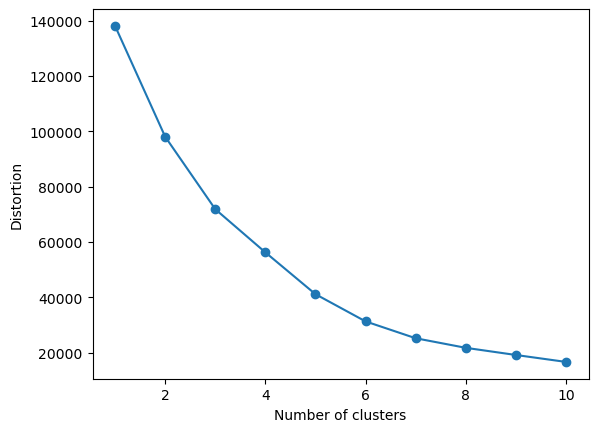

In [11]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, n_init=10)
    km.fit(dfX_scaled)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [12]:
n_cls = 4
km = KMeans(n_clusters=n_cls, n_init=10, random_state=5)
cls = km.fit_predict(dfX_scaled)
print(cls)

[2 2 0 ... 0 0 1]


In [13]:
df['cluster_no'] = cls
display(df.head())

,レシートNo,日,時間,顧客ID,税抜価格,税抜単価,個数,大カテゴリ番号,大カテゴリ名,中カテゴリ番号,中カテゴリ名,小カテゴリ番号,小カテゴリ名,性別,年代,cluster_no
0,1,1,9,1518,50,10,5,11,農産,1113,野菜,111327,じゃが芋,2,60,2
1,1,1,9,1518,50,10,5,11,農産,1113,野菜,111363,玉葱,2,60,2
2,1,1,9,1518,90,90,1,11,農産,1113,野菜,111361,レタス,2,60,0
3,1,1,9,1518,185,185,1,11,農産,1113,野菜,111339,トマト,2,60,0
4,2,1,9,1532,85,85,1,11,農産,1113,野菜,111318,キャベツ,1,40,0


In [14]:
print(df['cluster_no'].value_counts())

0    52804
1    13406
2     2391
3      478
Name: cluster_no, dtype: int64


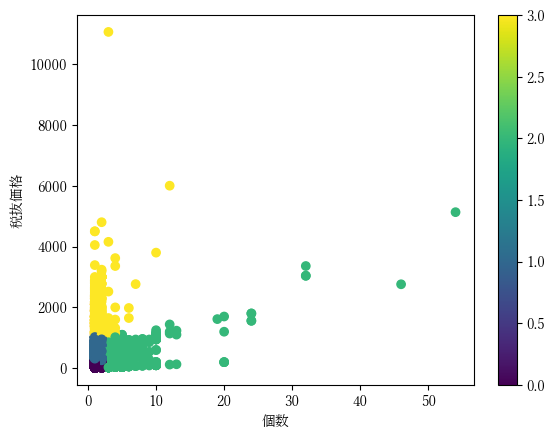

In [15]:
plt.rcParams['font.family'] = 'Yu Mincho'
plt.scatter(df['個数'], df['税抜価格'], 
            marker='o', c=df['cluster_no'])
plt.colorbar()
plt.xlabel('個数')
plt.ylabel('税抜価格')
plt.show()

In [16]:
print(km.cluster_centers_)

[[-0.15137827 -0.32822721]
 [-0.08253148  0.9453807 ]
 [ 3.74785871  0.39213574]
 [ 0.29009434  7.78313709]]


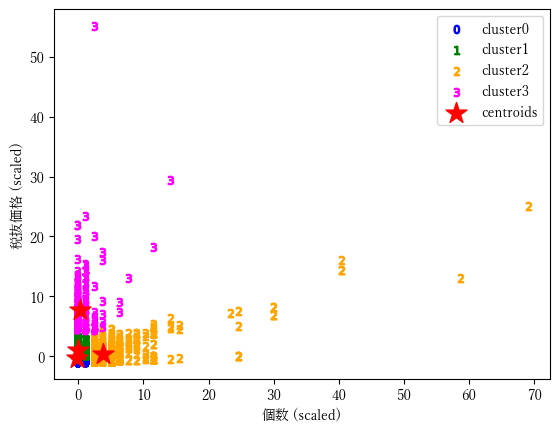

In [17]:
colors = ['blue', 'green', 'orange', 'magenta']
for i in range(n_cls):
    df_cls = dfX_scaled[ df['cluster_no']==i ]
    plt.scatter(df_cls['個数'], df_cls['税抜価格'],
                color=colors[i], marker='${}$'.format(i),
                label='cluster{}'.format(i))

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', color='red', label='centroids')

plt.xlabel('個数 (scaled)')
plt.ylabel('税抜価格 (scaled)')
plt.legend()
plt.show()